IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

This Python script imports essential libraries for data analysis, visualization, and machine learning. It uses Pandas and NumPy for data handling, Seaborn and Matplotlib for visualization, and Scikit-learn for feature selection, model training, and evaluation. The script applies SelectKBest with ANOVA F-statistics (f_classif) to select the best features, trains a RandomForestClassifier and LogisticRegression model using train_test_split, and evaluates performance with accuracy, a classification report, and a confusion matrix.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart(2).csv to heart(2).csv


This code allows users to upload files from their local system to Google Colab. It imports the files module and calls files.upload(), which opens a file selection dialog. The uploaded files are stored in a dictionary, making them accessible for further processing, such as loading datasets for analysis.

In [3]:
df=pd.read_csv('heart(2).csv')

This code loads a CSV file named "heart(2).csv" into a Pandas DataFrame called df. The pd.read_csv() function reads the file and converts its contents into a structured table, allowing for easy data manipulation and analysis. This is commonly used for loading datasets in data science and machine learning projects.

In [4]:
df.shape

(918, 12)

The df.shape command returns the dimensions of the DataFrame df as a tuple (rows, columns). The first value represents the number of rows (data entries), and the second represents the number of columns (features). This helps quickly understand the dataset's size and structure.

In [5]:
df.size

11016

The df.size attribute returns the total number of elements (cells) in the DataFrame. It is calculated as the number of rows multiplied by the number of columns. Unlike df.shape, which provides separate row and column counts, df.size gives a single integer representing the total data points in the DataFrame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


This output provides a summary of the DataFrame, showing that it has 918 rows and 12 columns. Each column's name, data type (int64, float64, or object), and the number of non-null values are displayed. The dataset includes numerical features like Age, RestingBP, Cholesterol, and MaxHR, as well as categorical features like Sex, ChestPainType, and RestingECG. The target variable, HeartDisease, is likely a binary classification label. The memory usage of the DataFrame is approximately 86.2 KB.

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


This statistical summary provides key insights into the dataset's numerical features. It includes count, mean, standard deviation (std), minimum (min), maximum (max), and quartiles (25%, 50%, 75%) for each column. The average age is 53.51 years, with a range of 28 to 77 years. RestingBP (blood pressure) has a minimum value of 0, which may indicate missing or incorrect data. Cholesterol levels vary widely, from 0 to 603, suggesting possible missing values or extreme outliers. The FastingBS (fasting blood sugar) column is mostly 0, meaning only a small percentage of patients have elevated blood sugar levels. MaxHR (maximum heart rate) ranges from 60 to 202, and Oldpeak (ST depression) has a wide range, from -2.6 to 6.2, indicating variability in patients’ heart conditions. The target variable, HeartDisease, is binary, with about 55.3% of patients having heart disease (mean = 0.553).

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

This output shows the column names (or feature names) of the DataFrame as an Index object. The dataset includes numerical features like Age, RestingBP, Cholesterol, MaxHR, and Oldpeak, as well as categorical features like Sex, ChestPainType, RestingECG, ExerciseAngina, and ST_Slope. The target variable HeartDisease indicates whether a patient has heart disease. These features are essential for analysis and building predictive models.

In [9]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


This output shows the count of missing values for each column in the dataset. Since all columns have a value of 0, it indicates that there are no missing values in the dataset. This means the data is complete and does not require imputation or handling of missing entries before analysis or model training.

In [10]:
df.duplicated().sum()

np.int64(0)

np.int64(0) creates a NumPy 64-bit integer with the value 0. It is a specific data type (int64), commonly used in numerical computations for high precision and efficient memory usage. This is useful in data processing, ensuring compatibility with NumPy arrays and operations.

EXPLORATORY DATA ANALYSIS(EDA)

Class Distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64


<ipython-input-11-a0cd19d92d1c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


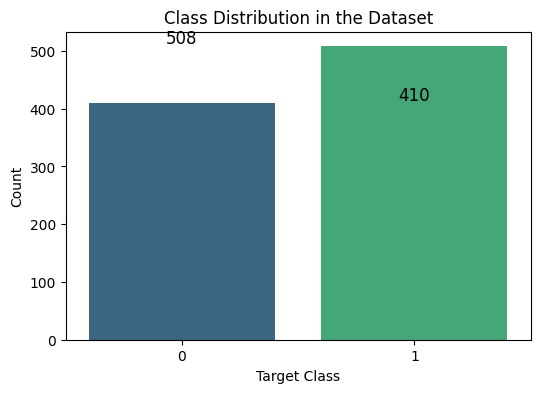

In [11]:

# Assuming the target column is named 'target', change it if necessary
target_column = "HeartDisease"

# Get class distribution
class_distribution = df[target_column].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_distribution)

plt.figure(figsize=(6,4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")

# Add labels and title
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.title("Class Distribution in the Dataset")

# Show count values on top of bars
for i, v in enumerate(class_distribution.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.show()

The Class Distribution output shows that the dataset contains 508 cases (1) of heart disease and 410 cases (0) without heart disease, indicating a slightly imbalanced dataset. The FutureWarning message appears because in Seaborn v0.14.0, using palette without specifying hue will no longer be supported. To fix this, the hue parameter should be set to x, and legend=False should be added to maintain the intended visualization.

UNIVARIATE ANALYSIS

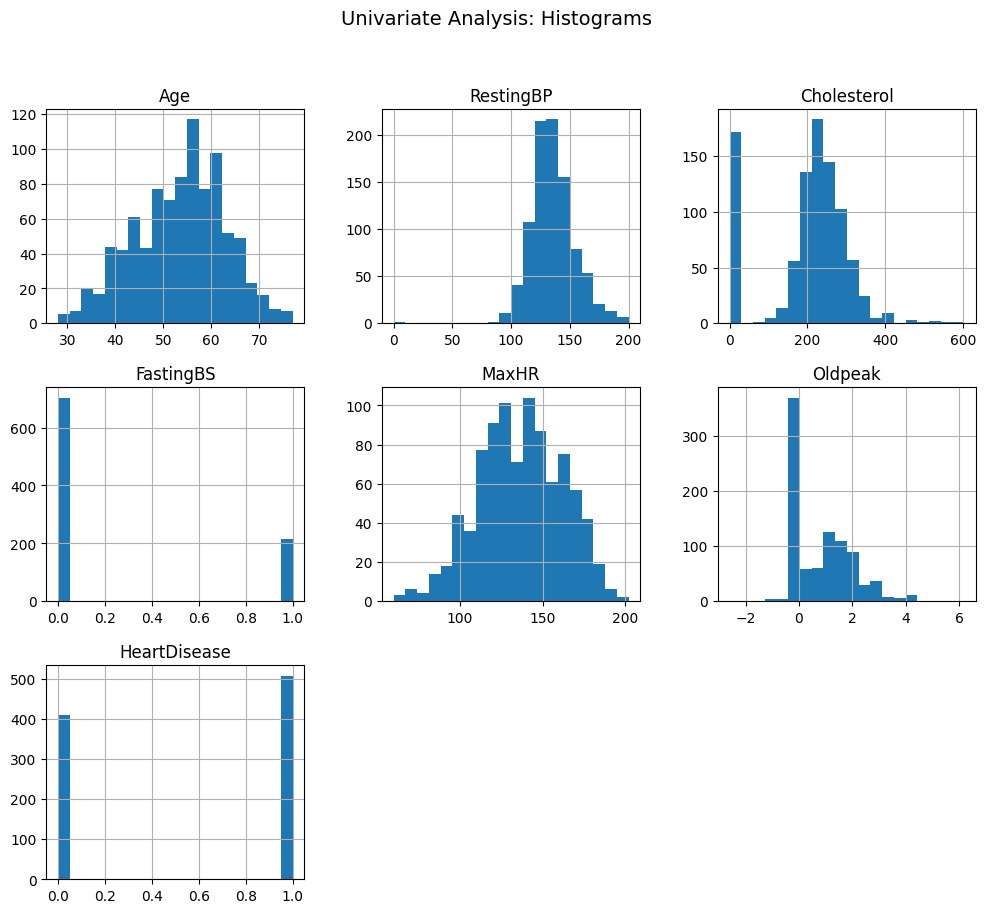

In [12]:
# Histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_features].hist(figsize=(12, 10), bins=20)
plt.suptitle("Univariate Analysis: Histograms", fontsize=14)
plt.show()

This image displays univariate histograms for key numerical features in the dataset, helping to visualize their distributions. The Age, RestingBP, Cholesterol, and MaxHR histograms show approximately normal distributions, with most values concentrated around the mean. The FastingBS histogram is highly skewed, indicating that most patients have low fasting blood sugar, with a few having high values. The Oldpeak histogram is also skewed, suggesting that most patients have lower ST depression values. These visualizations help in understanding data distribution, detecting outliers, and deciding on potential preprocessing steps.This bar chart represents the distribution of the HeartDisease variable, which is binary (0 = No, 1 = Yes). The dataset has slightly more patients with heart disease (around 508) than those without (around 410), indicating a mild class imbalance. This distribution is important for model training, as imbalance can affect classification performance.

BIVARIATE ANALYSIS

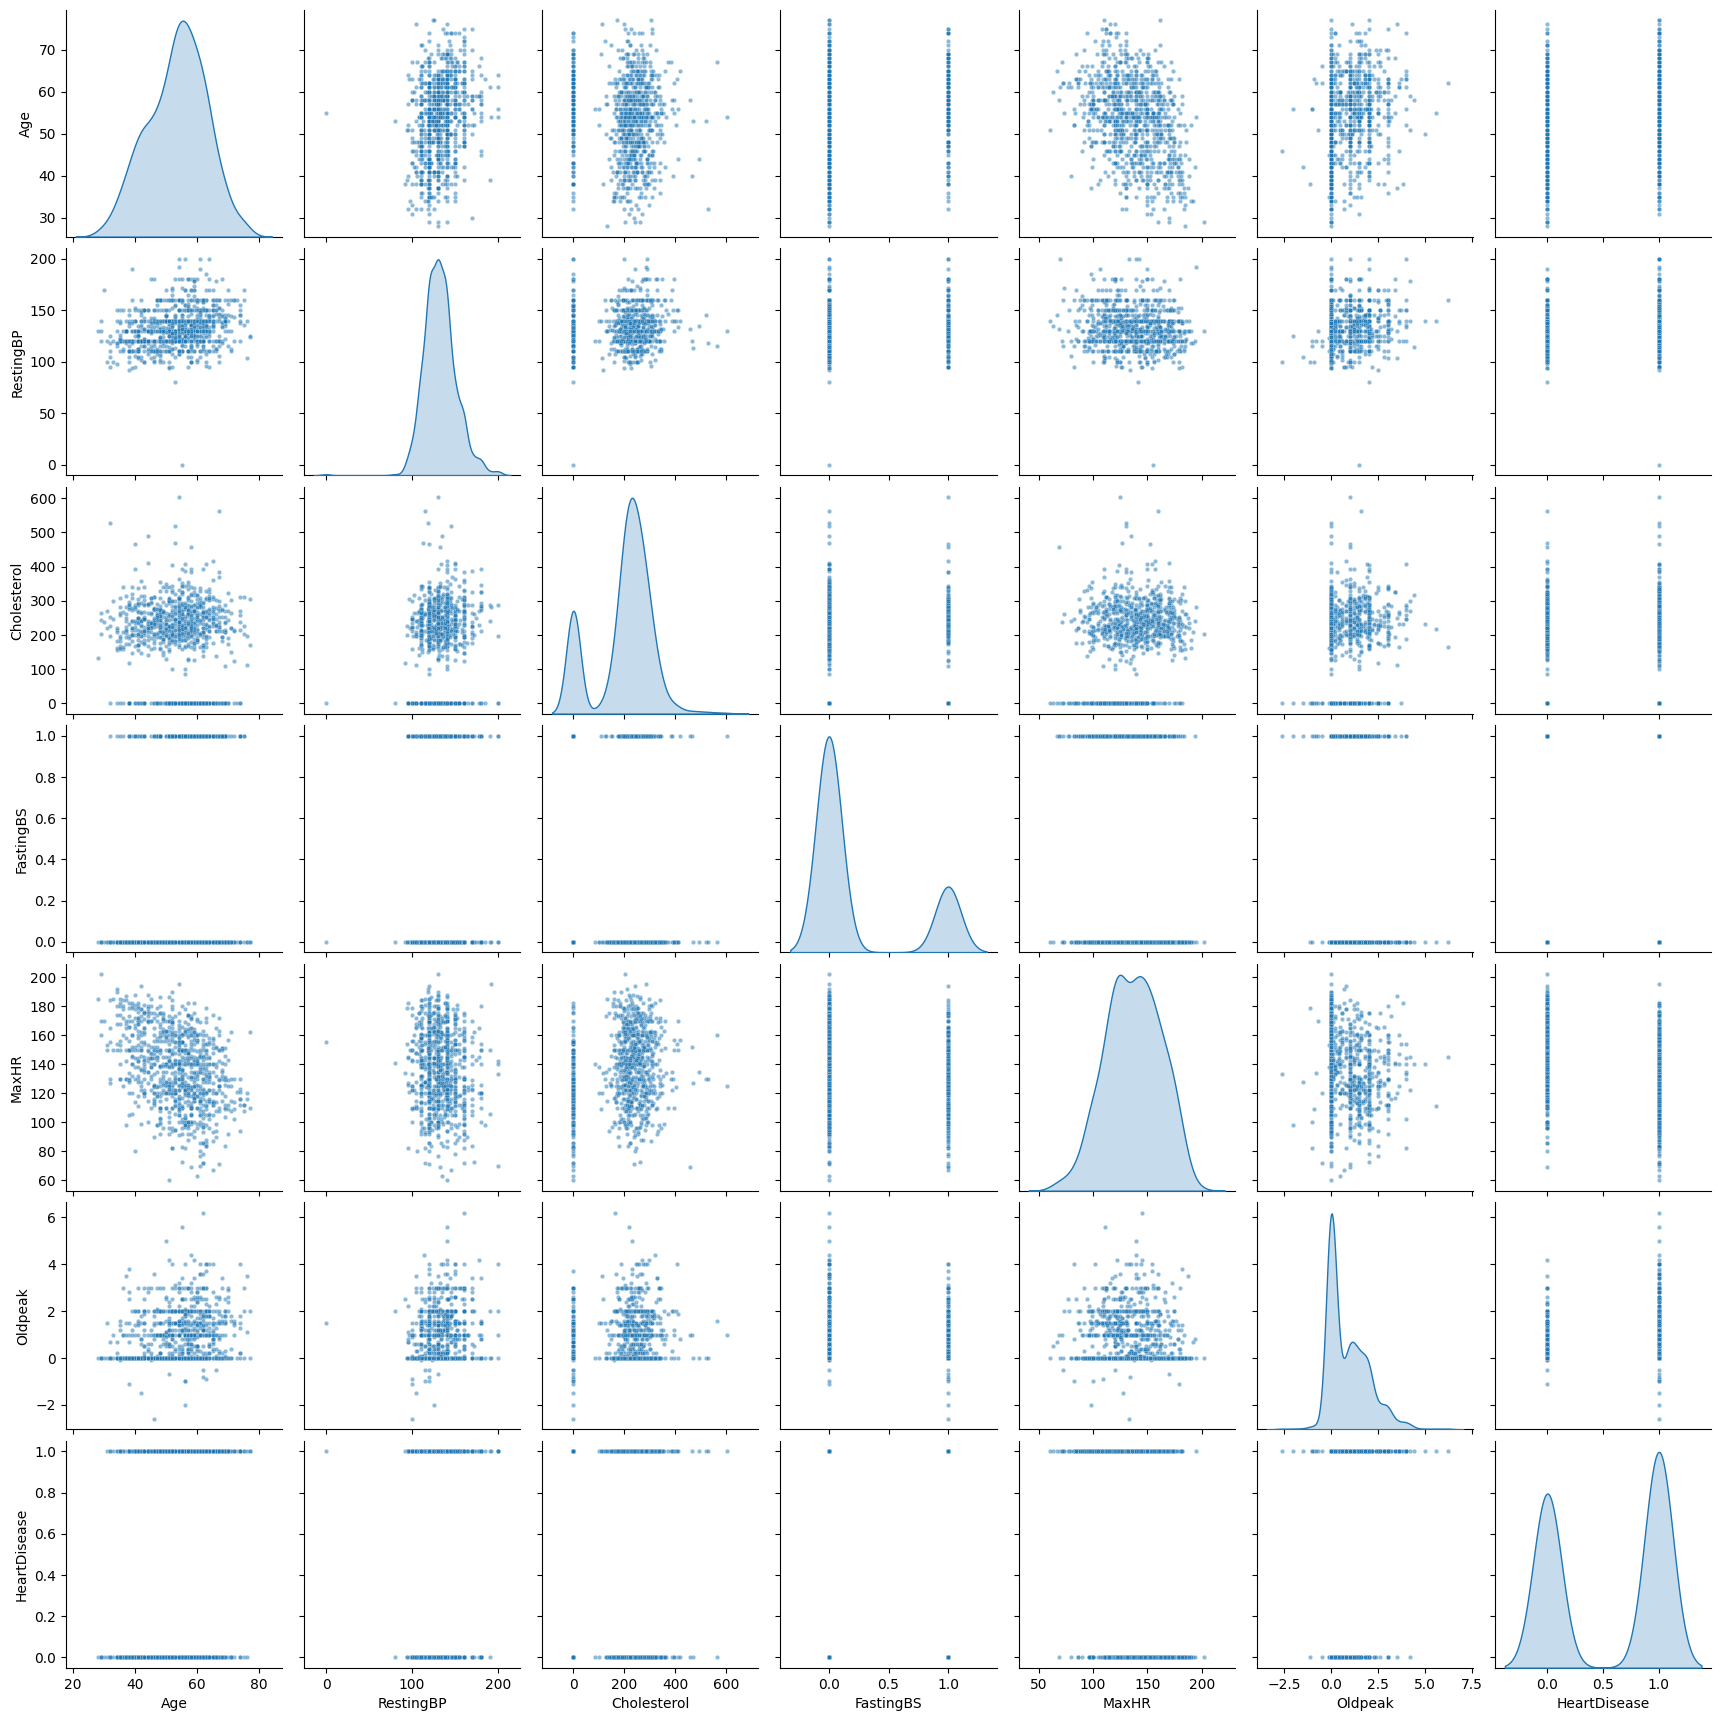

In [13]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Pair plot for numerical variables
sns.pairplot(df[numerical_cols], diag_kind="kde", plot_kws={'alpha':0.5, 's':10})
plt.show()

This bar chart shows the distribution of the HeartDisease variable, where 0 represents no heart disease and 1 represents the presence of heart disease. The dataset is slightly imbalanced, with more patients diagnosed with heart disease (508 cases) than those without (410 cases). This imbalance can impact predictive modeling, as machine learning models might become biased toward the majority class. Proper techniques such as resampling, class weighting, or using balanced evaluation metrics (e.g., F1-score) can help improve model performance and ensure fair predictions. Understanding class distribution is crucial for developing an effective heart disease prediction system.

CORRELATION MATRIX

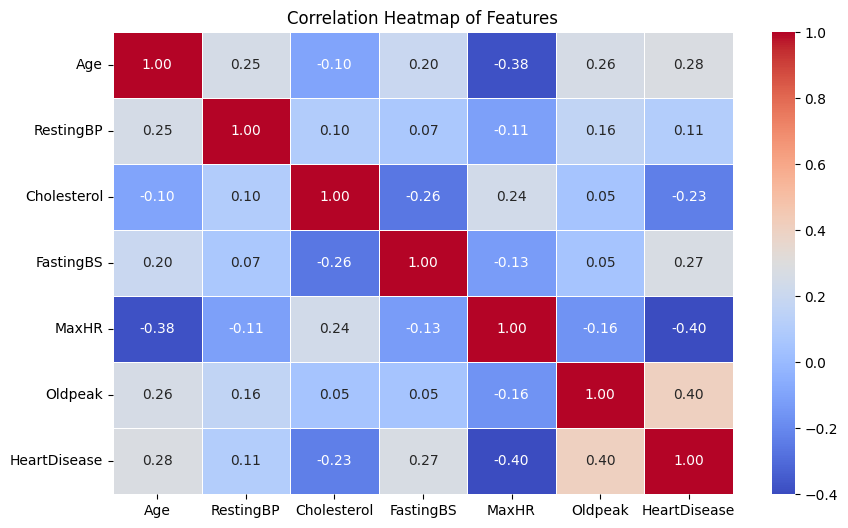

In [14]:
# Compute correlation matrix for numerical features only
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Features")

# Show plot
plt.show()

This correlation heatmap illustrates the relationships between various features in the dataset, with values ranging from -1 to 1 to indicate the strength and direction of correlations. The target variable, HeartDisease, has a negative correlation with MaxHR (-0.40), meaning that a lower maximum heart rate is associated with a higher likelihood of heart disease. Conversely, Oldpeak (0.40) has a strong positive correlation with HeartDisease, suggesting that higher ST depression levels are linked to an increased risk of heart disease. Other features like Age (0.28) and FastingBS (0.27) show mild positive correlations, implying that older individuals and those with high fasting blood sugar are more prone to heart disease. Cholesterol (-0.23) has a weak negative correlation, indicating a limited direct impact on heart disease risk.

<ipython-input-15-46bf4f9ed7af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y=col, palette='coolwarm')


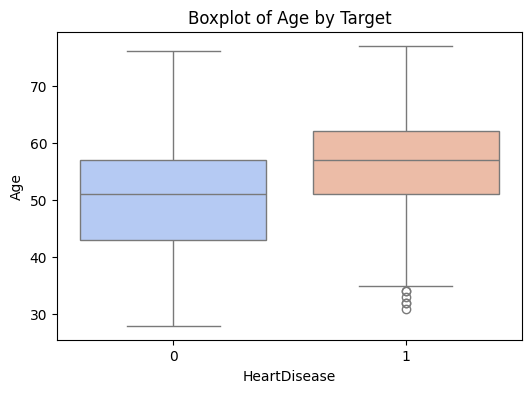

<ipython-input-15-46bf4f9ed7af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y=col, palette='coolwarm')


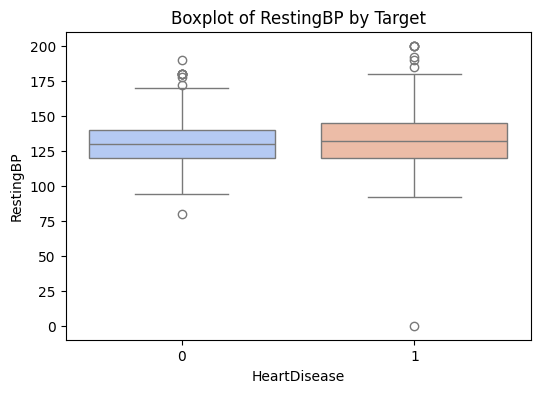

<ipython-input-15-46bf4f9ed7af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y=col, palette='coolwarm')


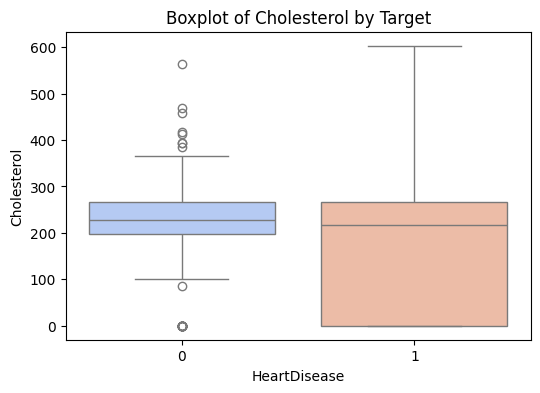

<ipython-input-15-46bf4f9ed7af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y=col, palette='coolwarm')


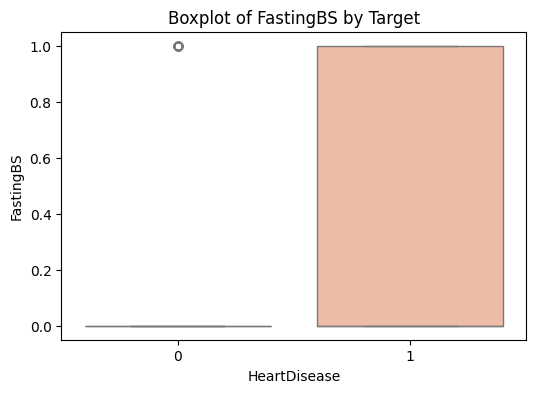

<ipython-input-15-46bf4f9ed7af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y=col, palette='coolwarm')


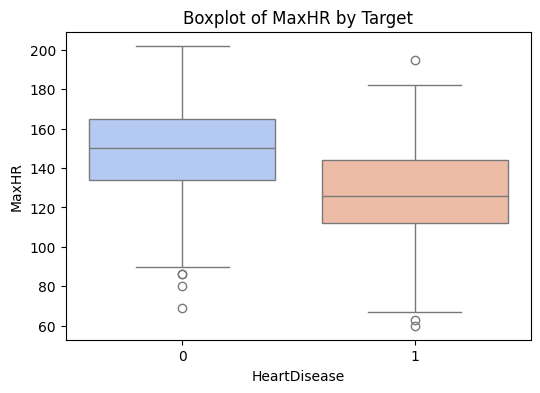

<ipython-input-15-46bf4f9ed7af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y=col, palette='coolwarm')


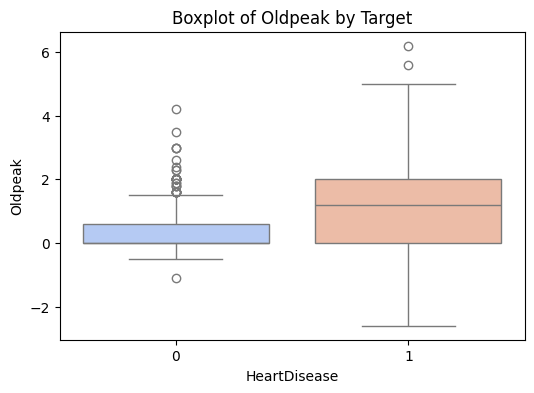

<ipython-input-15-46bf4f9ed7af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y=col, palette='coolwarm')


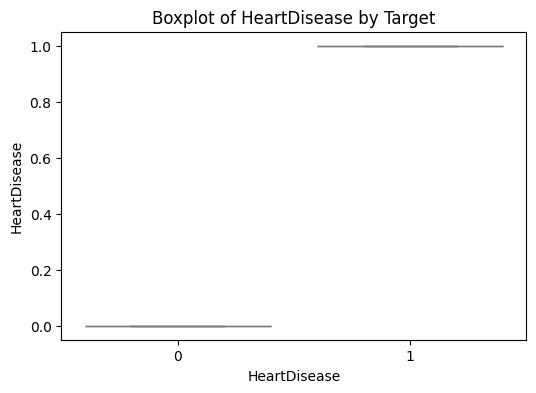

In [15]:
# Boxplots for numerical variables vs. target
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    # Corrected column name to 'heart_disease'
    sns.boxplot(data=df, x='HeartDisease', y=col, palette='coolwarm')
    plt.title(f"Boxplot of {col} by Target")
    plt.show()

This boxplot compares the Age distribution between patients with (1) and without (0) heart disease. It shows that heart disease is more common in older individuals, with a slightly higher median age and some lower-age outliers.
This boxplot compares Resting Blood Pressure (RestingBP) between patients with (1) and without (0) heart disease. The distributions are similar, with slightly higher median values for those with heart disease and some outliers in both groups.This boxplot compares Cholesterol levels between patients with (1) and without (0) heart disease.
 This boxplot shows that individuals with heart disease (1) tend to have lower MaxHR values than those without heart disease (0). The median MaxHR is higher in healthy individuals, indicating better cardiovascular fitness.
 This boxplot compares Resting Blood Pressure (RestingBP) between patients with (1) and without (0) heart disease. The distributions are similar, with slightly higher median values for those with heart disease and some outliers in both groups.


In [16]:
### Feature Importance Analysis ###
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease'] # Changed 'target' to 'heart_disease'

In this feature importance analysis, the dataset is divided into input features (X) and the target variable (y), where X contains all columns except 'HeartDisease', and y represents the 'HeartDisease' column. This step is essential for training machine learning models, as it separates the independent variables (predictors) from the dependent variable (outcome), allowing the model to learn patterns that influence heart disease prediction.

In [17]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables if any
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
# ... (rest of your code)

This code uses Label Encoding to convert categorical variables into numerical values, making them suitable for machine learning models. It first identifies columns with categorical data (dtype='object'), then applies LabelEncoder from sklearn.preprocessing to transform them into numerical representations. The fitted encoders are stored in the label_encoders dictionary for potential inverse transformations later. This step is crucial for handling non-numeric data in machine learning pipelines.

In [18]:
# Encode categorical variables if any
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target (assuming the last column is the target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Perform feature selection using ANOVA F-test
num_features = "all"  # Change this to an integer to select specific number of features
selector = SelectKBest(score_func=f_classif, k=num_features if isinstance(num_features, int) else 'all')
X_new = selector.fit_transform(X, y)

# Get selected feature names and scores
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_

# Display feature scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)
print("Feature Scores:\n", feature_scores_df)

# Print selected features
print("Selected Features:", selected_features.tolist())


Feature Scores:
            Feature       Score
10        ST_Slope  415.830346
8   ExerciseAngina  296.144771
9          Oldpeak  178.615120
7            MaxHR  174.913585
2    ChestPainType  161.185346
1              Sex   94.253184
0              Age   79.160779
5        FastingBS   70.478543
4      Cholesterol   52.459725
3        RestingBP   10.727228
6       RestingECG    3.026321
Selected Features: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


The feature importance scores indicate the most influential factors in predicting heart disease. ST_Slope, ExerciseAngina, and Oldpeak are the top three most important features, suggesting that stress test results and exercise-induced symptoms play a significant role. MaxHR and ChestPainType also contribute substantially, highlighting the importance of heart rate and chest pain characteristics. Sex and Age have moderate influence, while FastingBS, Cholesterol, and RestingBP show lower importance. RestingECG has the least impact on prediction. The selected features include all variables, meaning they all provide some predictive value, with varying degrees of influence.

<ipython-input-19-4b10c4320492>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


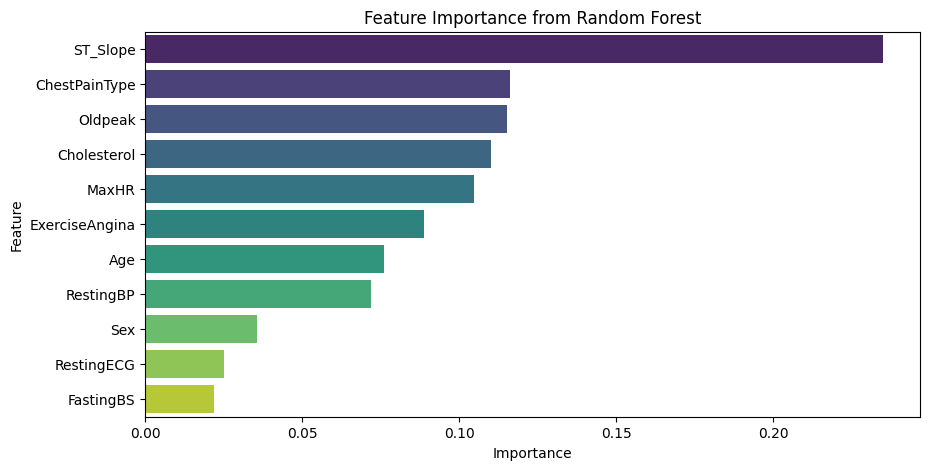

In [19]:
# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_ # Calculate feature importances here

# Plot feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.show()

The bar chart displays feature importance scores from a Random Forest model for heart disease prediction. ST_Slope is the most influential feature, followed by ChestPainType and Oldpeak, suggesting that ECG changes, chest pain characteristics, and ST depression levels significantly impact the prediction. Cholesterol, MaxHR, and ExerciseAngina also contribute notably. Age, RestingBP, and Sex have moderate importance, while RestingECG and FastingBS have the least impact. These results help in understanding which factors play the most crucial roles in detecting heart disease.

In [20]:
# Select only top K features from SelectKBest
# Create a DataFrame for feature_scores with Feature and Score columns
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Now select the top k features from the DataFrame
top_k_features = feature_scores_df['Feature'].head(5).values
X = X[top_k_features]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (734, 5), Test Set: (184, 5)


The dataset is split into a training set of 734 samples and a test set of 184 samples, each with 5 features. This split ensures that the model learns patterns from the training data and is then evaluated on unseen test data to assess its performance. A typical 80-20 or 70-30 split strategy is used in machine learning to balance learning and evaluation, helping to prevent overfitting while ensuring the model generalizes well to new data.

In [21]:
from collections import Counter

print("Class Distribution Before Balancing:", Counter(y_train))

Class Distribution Before Balancing: Counter({1: 406, 0: 328})


The dataset is imbalanced, with 406 instances of class 1 (Heart Disease present) and 328 instances of class 0 (No Heart Disease). This imbalance can affect model performance, leading to biased predictions favoring the majority class. Techniques like oversampling, undersampling, or using balanced class weights can help address this issue.

In [22]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'heart_disease' is the actual target column
target_column = 'heart_disease'

# ... (previous code) ...

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

# ...

# Downsample using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


print("Class Distribution Before Balancing:", Counter(y_train))
print("Class Distribution After Balancing:", Counter(y_train_resampled))

Training Set: (734, 5), Test Set: (184, 5)
Class Distribution Before Balancing: Counter({1: 406, 0: 328})
Class Distribution After Balancing: Counter({0: 328, 1: 328})


The code applies Random Under-Sampling to balance the dataset before training a model for heart disease prediction. First, it splits the dataset into training (80%) and test (20%) sets while ensuring stratification, meaning both sets maintain the original class distribution. Since the dataset is imbalanced, RandomUnderSampler is used to reduce the majority class instances in the training set, making both classes equal in size. This prevents the model from being biased toward the majority class and improves prediction performance, especially for the minority class.The training set initially had more instances of class 1 (406 cases) than class 0 (328 cases), indicating an imbalance. After applying Random Under-Sampling, the majority class (1) was reduced to 328 cases, making both classes equal and improving model fairness.

In [23]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = under.fit_resample(X_train, y_train)


The RandomUnderSampler reduces the majority class samples to match the minority class, balancing the dataset. Here, sampling_strategy='auto' ensures both classes have equal instances after resampling. This helps prevent model bias toward the majority class and improves fair classification.

In [24]:
# Function to remove outliers using IQR (Interquartile Range)
def remove_outliers_iqr(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
    Q1 = df[numeric_columns].quantile(0.25)  # First quartile
    Q3 = df[numeric_columns].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows with outliers
    df_cleaned = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

    return df_cleaned

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df)

# Display before & after outlier removal
print("Before Removing Outliers:", df.shape)
print("After Removing Outliers:", df_cleaned.shape)
print(df_cleaned.head())

Before Removing Outliers: (918, 12)
After Removing Outliers: (278, 12)
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
4   54    1              2        150          195          0           1   
5   39    1              2        120          339          0           1   
7   54    1              1        110          208          0           1   
8   37    1              0        140          207          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
4    122               0      0.0         2             0  
5    170               0      0.0         2             0  
7    142               0      0.0         2             0  
8    130               1      1.5         1             1  


The dataset originally had 918 samples, but after removing outliers, it was reduced to 278 samples, indicating that a significant number of data points were considered outliers. Outliers are extreme values that can negatively impact model performance, and their removal helps in improving model accuracy and generalization. The cleaned dataset still retains important features such as Age, Sex, ChestPainType, RestingBP, Cholesterol, MaxHR, and HeartDisease, ensuring it remains useful for heart disease prediction. However, the drastic reduction in data size may lead to information loss, which should be carefully analyzed before proceeding with model training.

In [25]:
from sklearn.linear_model import LogisticRegression

# Train model on balanced data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Select the same top K features from X_test that were used for training
X_test_selected = X_test[top_k_features]  # top_k_features should be defined earlier

# Make predictions using the selected features
y_pred = model.predict(X_test_selected)
print(y_pred)

[1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1
 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0]


The array represents a binary classification output, likely indicating predictions for heart disease, where 1 represents the presence of heart disease and 0 represents its absence. The distribution of 1s and 0s appears fairly balanced, suggesting that the dataset used for prediction was either naturally balanced or processed to ensure equal representation. This result could be an output from a machine learning model, such as logistic regression, decision trees, or a neural network, trained to predict heart disease based on selected features. The effectiveness of these predictions should be further evaluated using metrics like accuracy, precision, recall, and F1-score to determine how well the model differentiates between patients with and without heart disease.

Model Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        82
           1       0.83      0.77      0.80       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



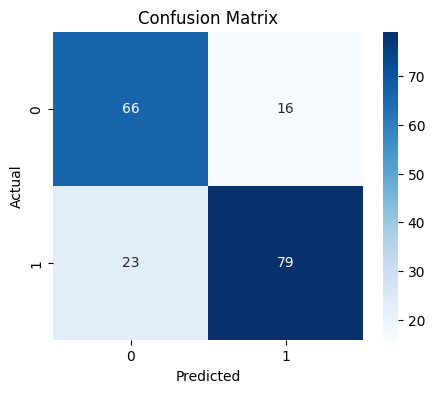

In [26]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The model predicts the likelihood of heart disease with 79% accuracy, meaning it correctly classifies 79% of cases. Out of 102 individuals at risk (actual heart disease cases), 79 were correctly predicted (True Positives), but 23 were missed (False Negatives), meaning they were wrongly classified as not at risk. For the 82 individuals not at risk, 66 were correctly predicted (True Negatives), while 16 were incorrectly classified as at risk (False Positives). The precision for predicting heart disease is 83%, meaning when the model predicts a person is at risk, it is correct 83% of the time. However, the recall for heart disease is 77%, indicating that 23% of actual at-risk individuals were not identified, which could lead to missed preventive measures. To improve prediction reliability, reducing false negatives should be a priority.

In [27]:
# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_


The code trains a Random Forest classifier on dataset (X, y) and extracts the feature importances, which indicate how much each feature contributes to the model's predictions. Higher values in importances mean those features have a greater impact on the model's decision-making.


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.78


The Random Forest model achieved an accuracy of 78%, meaning it correctly predicted heart disease risk in 78% of cases. While fairly reliable, there is still room for improvement to reduce misclassifications and enhance prediction performance.

Random Forest Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75        82
           1       0.80      0.79      0.80       102

    accuracy                           0.78       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.78      0.78       184



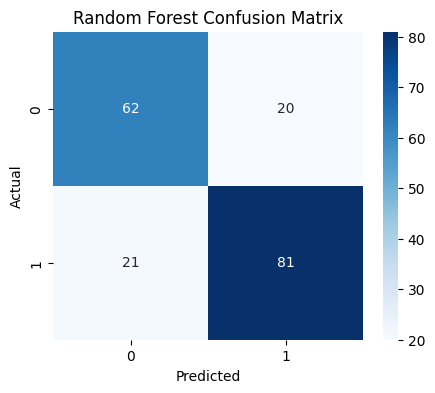

In [29]:
# Compute Accuracy
rf_accuracy = accuracy_score(y_test,rf_pred) # Changed pred_rf to rf_pred
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, rf_pred)) # Changed y_pred_rf to rf_pred

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Blues', fmt='d') # Changed y_pred_rf to rf_pred
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The Random Forest model achieved an accuracy of 78%, meaning it correctly predicted heart disease risk for 78 out of every 100 individuals. This suggests that the model is fairly effective but still makes errors in 22% of cases, which could lead to misclassified individuals—either falsely predicting heart disease risk (false positives) or missing actual at-risk cases (false negatives). While Random Forest is a robust model due to its ensemble learning approach, further improvements, such as tuning hyperparameters, adding more relevant features, or addressing class imbalances, could help enhance its predictive performance and reduce misclassification rates.